Renderização do Cogumelo

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab import drive

In [17]:
a = np.zeros((5,5))

Red = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0.4235, 0.4235, 0.4235, 0.9569, 0.9569, 0.4235, 0.9569, 1, 1, 1, 1],
    [1, 1, 0.4235, 0.9569, 0.4235, 0.9569, 0.9569, 0.9569, 0.4235, 0.9569, 0.9569, 0.9569, 1, 1],
    [1, 1, 0.4235, 0.9569, 0.4235, 0.4235, 0.9569, 0.9569, 0.9569, 0.4235, 0.9569, 0.9569, 0.9569, 1],
    [1, 1, 0.4235, 0.4235, 0.9569, 0.9569, 0.9569, 0.9569, 0.4235, 0.4235, 0.4235, 0.4235, 1, 1],
    [1, 1, 1, 1, 0.9569, 0.9569, 0.9569, 0.9569, 0.9569, 0.9569, 0.9569, 1, 1, 1],
    [1, 1, 1, 0.4235, 0.4235, 1, 0.4235, 0.4235, 1, 1, 1, 1, 1, 1],
    [1, 1, 0.4235, 0.4235, 0.4235, 1, 0.4235, 0.4235, 1, 0.4235, 0.4235, 0.4235, 1, 1],
    [1, 0.4235, 0.4235, 0.4235, 0.4235, 1, 1, 1, 1, 0.4235, 0.4235, 0.4235, 0.4235, 1],
    [1, 0.9569, 0.9569, 0.4235, 1, 0.9569, 1, 1, 0.9569, 1, 0.4235, 0.9569, 0.9569, 1],
    [1, 0.9569, 0.9569, 0.9569, 1, 1, 1, 1, 1, 1, 0.9569, 0.9569, 0.9569, 1],
    [1, 0.9569, 0.9569, 1, 1, 1, 1, 1, 1, 1, 1, 0.9569, 0.9569, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0.4235, 0.4235, 0.4235, 1, 1, 1, 1, 0.4235, 0.4235, 0.4235, 1, 1],
    [1, 0.4235, 0.4235, 0.4235, 0.4235, 1, 1, 1, 1, 0.4235, 0.4235, 0.4235, 0.4235, 1],
], dtype=np.float32)
# marrom: 42,35% vermelho, 23,53% verde, 4,71% azul
# 0.4235, 0.2353, 0.0471

# cor de pele: 0.9569 0.6431 0.3765
Green = np.array([
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 0.2353, 0.2353, 0.2353, 0.6431, 0.6431, 0.2353, 0.6431, 1, 1, 1, 1],
    [1, 1, 0.2353, 0.6431, 0.2353, 0.6431, 0.6431, 0.6431, 0.2353, 0.6431, 0.6431, 0.6431, 1, 1],
    [1, 1, 0.2353, 0.6431, 0.2353, 0.2353, 0.6431, 0.6431, 0.6431, 0.2353, 0.6431, 0.6431, 0.6431, 1],
    [1, 1, 0.2353, 0.2353, 0.6431, 0.6431, 0.6431, 0.6431, 0.2353, 0.2353, 0.2353, 0.2353, 1, 1],
    [1, 1, 1, 1, 0.6431, 0.6431, 0.6431, 0.6431, 0.6431, 0.6431, 0.6431, 1, 1, 1],
    [1, 1, 1, 0.2353, 0.2353, 0, 0.2353, 0.2353, 0, 1, 1, 1, 1, 1],
    [1, 1, 0.2353, 0.2353, 0.2353, 0, 0.2353, 0.2353, 0, 0.2353, 0.2353, 0.2353, 1, 1],
    [1, 0.2353, 0.2353, 0.2353, 0.2353, 0, 0, 0, 0, 0.2353, 0.2353, 0.2353, 0.2353, 1],
    [1, 0.6431, 0.6431, 0.2353, 0, 0.6431, 0, 0, 0.6431, 0, 0.2353, 0.6431, 0.6431, 1],
    [1, 0.6431, 0.6431, 0.6431, 0, 0, 0, 0, 0, 0, 0.6431, 0.6431, 0.6431, 1],
    [1, 0.6431, 0.6431, 0, 0, 0, 0, 0, 0, 0, 0, 0.6431, 0.6431, 1],
    [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 0.2353, 0.2353, 0.2353, 1, 1, 1, 1, 0.2353, 0.2353, 0.2353, 1, 1],
    [1, 0.2353, 0.2353, 0.2353, 0.2353, 1, 1, 1, 1, 0.2353, 0.2353, 0.2353, 0.2353, 1],
], dtype=np.float32)

Blue = np.array([
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 0.0471, 0.0471, 0.0471, 0.3765, 0.3765, 0.0471, 0.3765, 1, 1, 1, 1],
    [1, 1, 0.0471, 0.3765, 0.0471, 0.3765, 0.3765, 0.3765, 0.0471, 0.3765, 0.3765, 0.3765, 1, 1],
    [1, 1, 0.0471, 0.3765, 0.0471, 0.0471, 0.3765, 0.3765, 0.3765, 0.0471, 0.3765, 0.3765, 0.3765, 1],
    [1, 1, 0.0471, 0.0471, 0.3765, 0.3765, 0.3765, 0.3765, 0.0471, 0.0471, 0.0471, 0.0471, 1, 1],
    [1, 1, 1, 1, 0.3765, 0.3765, 0.3765, 0.3765, 0.3765, 0.3765, 0.3765, 1, 1, 1],
    [1, 1, 1, 0.0471, 0.0471, 0, 0.0471, 0.0471, 0, 1, 1, 1, 1, 1],
    [1, 1, 0.0471, 0.0471, 0.0471, 0, 0.0471, 0.0471, 0, 0.0471, 0.0471, 0.0471, 1, 1],
    [1, 0.0471, 0.0471, 0.0471, 0.0471, 0, 0, 0, 0, 0.0471, 0.0471, 0.0471, 0.0471, 1],
    [1, 0.3765, 0.3765, 0.0471, 0, 0.3765, 0, 0, 0.3765, 0, 0.0471, 0.3765, 0.3765, 1],
    [1, 0.3765, 0.3765, 0.3765, 0, 0, 0, 0, 0, 0, 0.3765, 0.3765, 0.3765, 1],
    [1, 0.3765, 0.3765, 0, 0, 0, 0, 0, 0, 0, 0, 0.3765, 0.3765, 1],
    [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 0.0471, 0.0471, 0.0471, 1, 1, 1, 1, 0.0471, 0.0471, 0.0471, 1, 1],
    [1, 0.0471, 0.0471, 0.0471, 0.0471, 1, 1, 1, 1, 0.0471, 0.0471, 0.0471, 0.0471, 1],
], dtype=np.float32)

a2 = np.zeros((16,14,3), dtype=np.float32)


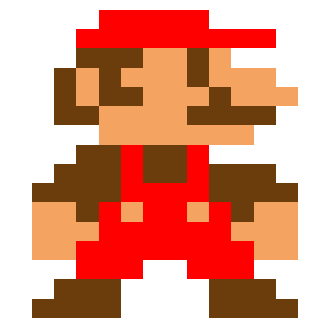

In [18]:
a2[:,:,0] = Red
a2[:,:,1] = Green
a2[:,:,2] = Blue

plt.figure(figsize=(4,4))
im = plt.imshow(a2, aspect='auto')
plt.axis("off")
plt.show()